# TP1 - Vision por computadora 1

Integrantes:
- Legajo: xxxx - Nombre: Isidro Marco Joel
- Legajo: xxxx - Nombre: Sarina Diego

## Parte 1

Con las imágenes en /white_patch y /coord_cromaticas:
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

In [1]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Coordenadas cromáticas

A continuación se muestra el código que implementa el algoritmo de pasaje a coordenadas cromáticas y se muestra el resultado obtenido sobre las imágenes de la carpeta /coord_cromaticas.

In [38]:
Images_Original = []

for i in range(1, 4):
    print(f'enunciado/coord_cromaticas/CoordCrom_{i}.png')
    Images_Original.append(cv.imread(f'enunciado/coord_cromaticas/CoordCrom_{i}.png'))


enunciado/coord_cromaticas/CoordCrom_1.png
enunciado/coord_cromaticas/CoordCrom_2.png
enunciado/coord_cromaticas/CoordCrom_3.png


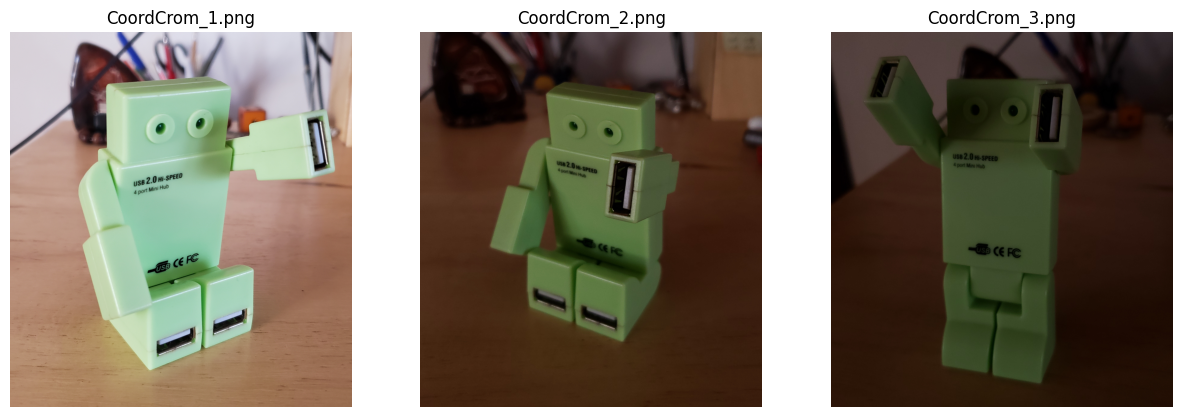

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axs):
    ax.imshow(cv.cvtColor(Images_Original[i], cv.COLOR_BGR2RGB))
    ax.set_title(f'CoordCrom_{i+1}.png')
    ax.axis('off')

plt.show()

In [40]:
def get_coord_cromaticas(image: np.ndarray) -> np.ndarray:
    """
    Función que calcula las coordenadas cromáticas de una imagen.

    Parameters
    ----------
    image : numpy array
        Imagen de entrada.
    
    Returns
    -------
    coord_cromaticas : numpy array
        Coordenadas cromáticas de la imagen.
    """

    # se pasan los valores a float para mayor precisión
    image = image.astype(float)
    
    # se calcula la suma de los canales R, G, B en cada pixel
    suma = np.sum(image, axis=-1, keepdims=True)
    
    # se previene la división por cero
    suma[suma == 0] = 1
    
    # se obtienen las coordenadas cromáticas dividiendo cada canal por la suma total
    coord_cromaticas = image / suma
    
    return coord_cromaticas

In [41]:
Images_CoordCrom = []

for imagen in Images_Original:
    Images_CoordCrom.append(get_coord_cromaticas(imagen))

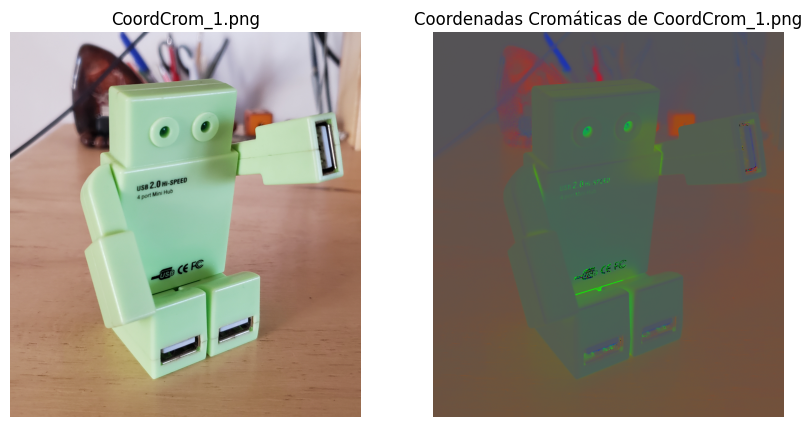

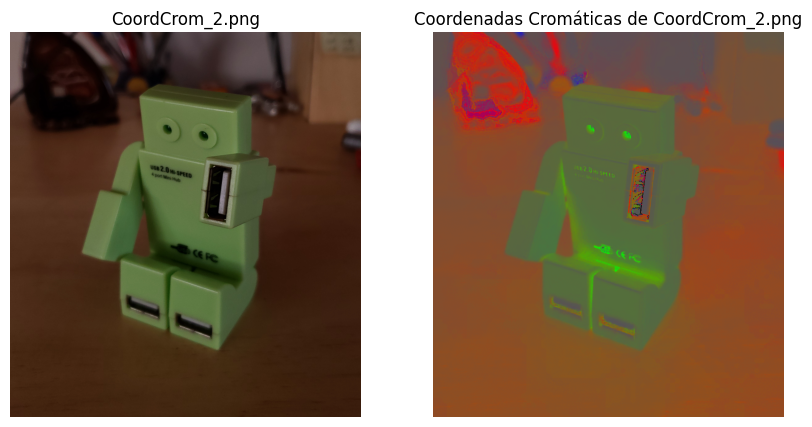

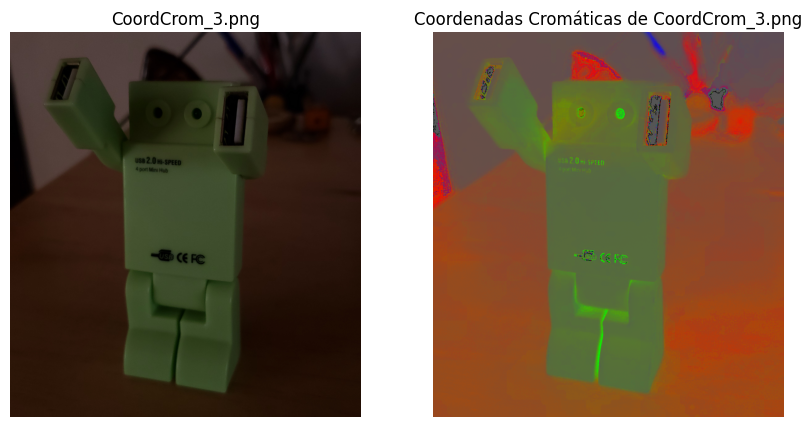

In [42]:
# graficar la comparación entre las originales y las coordenadas cromáticas
for i in range(3):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(cv.cvtColor(Images_Original[i].astype(np.uint8), cv.COLOR_BGR2RGB))
    axs[0].set_title(f'CoordCrom_{i+1}.png')
    axs[0].axis('off')

    axs[1].imshow(Images_CoordCrom[i][:, :, ::-1])
    axs[1].set_title(f'Coordenadas Cromáticas de CoordCrom_{i+1}.png')
    axs[1].axis('off')

    plt.show()


### White Patch

A continuación se muestra el código que implementa el algoritmo White Patch y se muestra el resultado obtenido sobre las imágenes de la carpeta /white_patch. Además, se analizan las posibles fallas en el caso de White Patch.

In [51]:
Images_test_Original = []
Paths_test_Original = ['test_blue.png', 'test_green.png', 'test_red.png']

Images_wp_Original = []
Paths_wp_Original = ['wp_blue.jpg', 'wp_green.png', 'wp_green2.jpg', 'wp_red.png', 'wp_red2.jpg']

for path in Paths_test_Original:
    Images_test_Original.append(cv.imread(f'enunciado/white_patch/{path}'))

for path in Paths_wp_Original:
    Images_wp_Original.append(cv.imread(f'enunciado/white_patch/{path}'))

In [72]:
def white_patch_max(image):
    # Se castean los valores de los tres canales a float para permitir cálculos con mayor precisión
    image = image.astype(np.float32)
    
    # Se calcula el máximo para cada canal (R, G y B)
    max_rgb = np.max(image, axis=(0, 1))

    corrected_image = (image / max_rgb) * 255.0
    corrected_image = np.minimum(corrected_image, 255.0)
    
    return corrected_image.astype(np.uint8)

In [73]:
def white_patch_percentile(image: np.ndarray, percentil = 95) -> np.ndarray:
    """
    Parameters
    ----------
    img_entrada:np.ndarray 
        Imagen de entrada
    percentil: Percentil a utilizar en cada canal RGB cuando los tres sean 255
    
    Return
    ------
    img: (numpy.ndarray) imagen con ajuste de White Patch
    """
    # Se castean los valores de los tres canales a float para permitir cálculos con mayor precisión
    image = image.astype(np.float32)
    
    # Se calcula el máximo para cada canal (R, G y B)
    max_rgb = np.max(image, axis=(0, 1))

    if np.allclose(max_rgb, [255., 255., 255.], rtol=0, atol=20):
        max_rgb = np.array([np.percentile(image[:, :, i], percentil) for i in range(3)])

    corrected_image = (image / max_rgb) * 255.0
    corrected_image = np.minimum(corrected_image, 255.0)

    # Se vuelven a convertir los valores a enteros
    corrected_image = corrected_image.astype(np.uint8)
    
    return corrected_image

In [74]:
Images_test_WhiteP_percentile = []
Images_wp_WhiteP_percentile = []
Images_test_WhiteP_max = []
Images_wp_WhiteP_max = []

for imagen in Images_test_Original:
    Images_test_WhiteP_percentile.append(white_patch_percentile(imagen))
    Images_test_WhiteP_max.append(white_patch_max(imagen))


for imagen in Images_wp_Original:
    Images_wp_WhiteP_percentile.append(white_patch_percentile(imagen))
    Images_wp_WhiteP_max.append(white_patch_max(imagen))

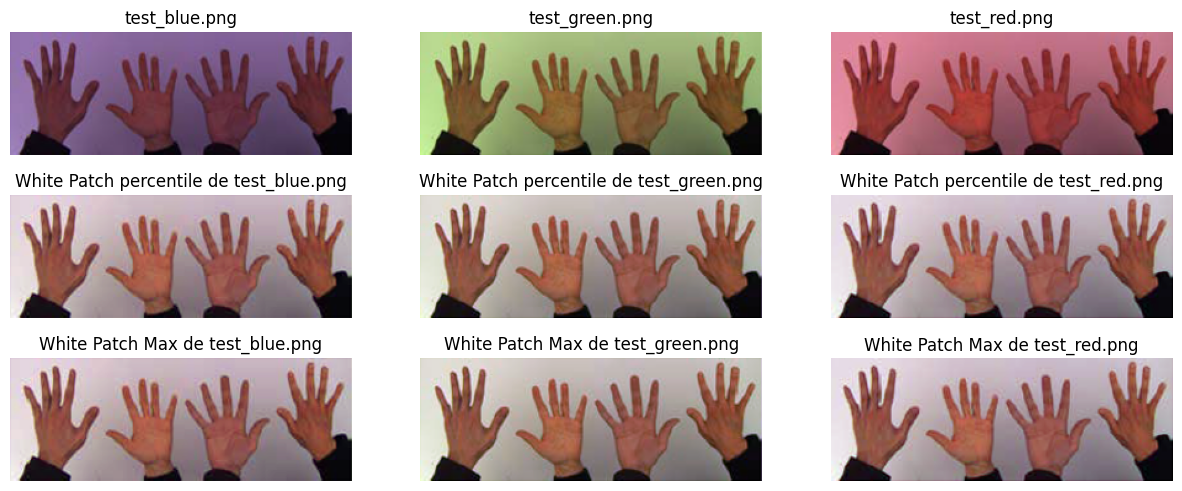

In [75]:
# graficar la comparación entre las originales y las coordenadas cromáticas en una sola figura
fig, axs = plt.subplots(3, 3, figsize=(15, 6))
for i in range(3):
    axs[0, i].imshow(cv.cvtColor(Images_test_Original[i].astype(np.uint8), cv.COLOR_BGR2RGB))
    axs[0, i].set_title(f'{Paths_test_Original[i]}')
    axs[0, i].axis('off')

    axs[1, i].imshow(Images_test_WhiteP_percentile[i][:, :, ::-1].astype(np.uint8))
    axs[1, i].set_title(f'White Patch percentile de {Paths_test_Original[i]}')
    axs[1, i].axis('off')

    axs[2, i].imshow(Images_test_WhiteP_max[i][:, :, ::-1].astype(np.uint8))
    axs[2, i].set_title(f'White Patch Max de {Paths_test_Original[i]}')
    axs[2, i].axis('off')

plt.show()

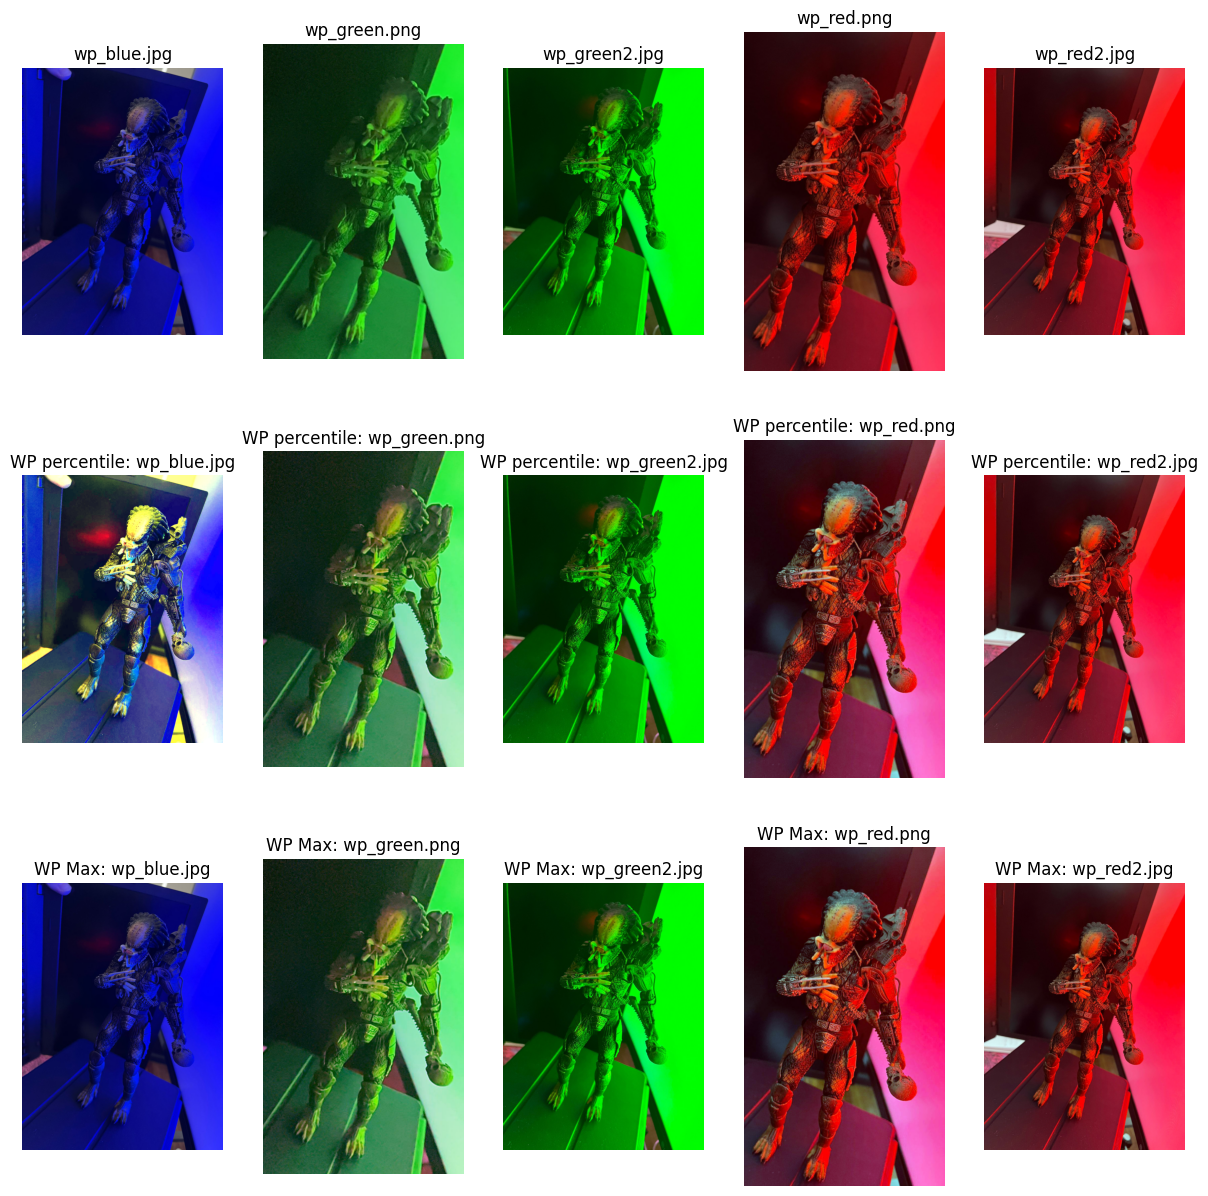

In [78]:
fig, axs = plt.subplots(3, 5, figsize=(15, 15))
for i in range(5):
    axs[0, i].imshow(cv.cvtColor(Images_wp_Original[i].astype(np.uint8), cv.COLOR_BGR2RGB))
    axs[0, i].set_title(f'{Paths_wp_Original[i]}')
    axs[0, i].axis('off')

    axs[1, i].imshow(Images_wp_WhiteP_percentile[i][:, :, ::-1].astype(np.uint8))
    axs[1, i].set_title(f'WP percentile: {Paths_wp_Original[i]}')
    axs[1, i].axis('off')

    axs[2, i].imshow(Images_wp_WhiteP_max[i][:, :, ::-1].astype(np.uint8))
    axs[2, i].set_title(f'WP Max: {Paths_wp_Original[i]}')
    axs[2, i].axis('off')
    
plt.show()

análisis ...

## Parte 2

1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los 
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes 
separadas.


In [12]:
# cargar imagenes en escala de grises
Images_Gray = []
Paths_Gray = ['img1_tp.png', 'img2_tp.png']

for path in Paths_Gray:
    Images_Gray.append(cv.imread(f'enunciado/{path}', cv.IMREAD_GRAYSCALE))

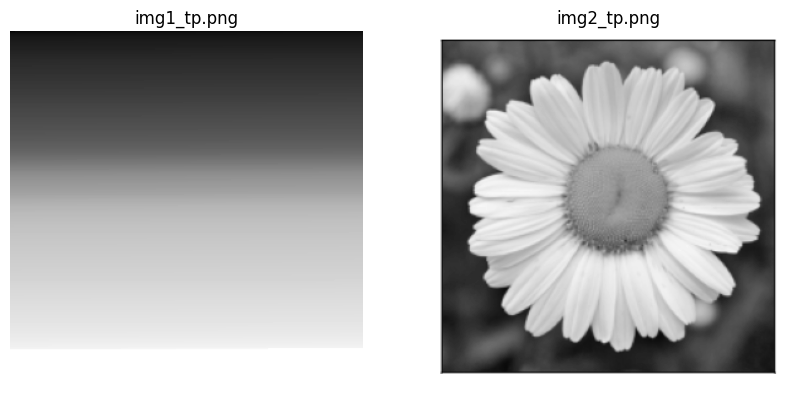

In [13]:
# graficar las imágenes en escala de grises
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    axs[i].imshow(Images_Gray[i], cmap='gray')
    axs[i].set_title(f'{Paths_Gray[i]}')
    axs[i].axis('off')

plt.show()